In [2]:
import numpy as np;
import pandas as pan;
import matplotlib.pyplot as plotter;
import seaborn as sns;

In [3]:
fandango_matrix_data = pan.read_csv("fandango_scrape.csv");
other_matrix_data = pan.read_csv("all_sites_scores.csv");

In [4]:
print(fandango_matrix_data.head());
print(fandango_matrix_data.info());
print(fandango_matrix_data.columns);

                          FILM  STARS  RATING  VOTES
0  Fifty Shades of Grey (2015)    4.0     3.9  34846
1        Jurassic World (2015)    4.5     4.5  34390
2       American Sniper (2015)    5.0     4.8  34085
3             Furious 7 (2015)    5.0     4.8  33538
4            Inside Out (2015)    4.5     4.5  15749
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB
None
Index(['FILM', 'STARS', 'RATING', 'VOTES'], dtype='object')


In [44]:
print(other_matrix_data.head());
print(other_matrix_data.info());

                             FILM  RottenTomatoes  RottenTomatoes_User   
0  Avengers: Age of Ultron (2015)              74                   86  \
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count   
0          66              7.1   7.8                        1330  \
1          67              7.5   7.1                         249   
2          64              8.1   7.8                         627   
3          22              4.7   5.4                          31   
4          29              3.4   5.1                          88   

   IMDB_user_vote_count  
0                271107  
1                 65709  
2                103660  
3                  3136  
4               

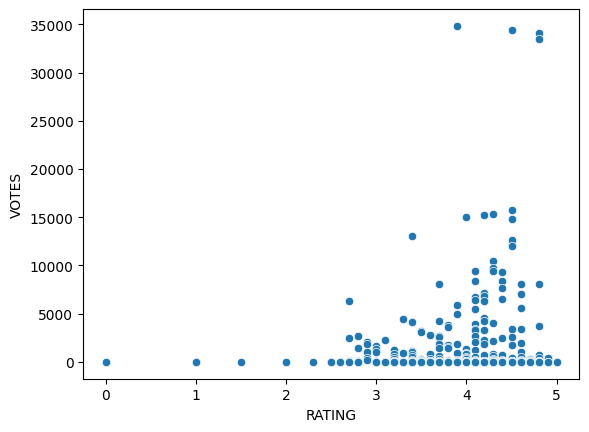

In [6]:
#scatterplot showing the relationship between the site generated rating and votes given by users
sns.scatterplot(y = fandango_matrix_data["VOTES"], x = fandango_matrix_data["RATING"]);

In [7]:
#this is the correlation between the numeric columns present in the fandango dataset. If the website is legit, the correlation between the rating and stars should be ~0.9 +-0.05 
print(fandango_matrix_data.corr(numeric_only= True));

           STARS    RATING     VOTES
STARS   1.000000  0.994696  0.164218
RATING  0.994696  1.000000  0.163764
VOTES   0.164218  0.163764  1.000000


In [8]:
#we want to check the release year of the fandango movies
fandango_matrix_data["RELEASE_YEAR"] = np.vectorize(lambda x: x[-5:-1])(fandango_matrix_data["FILM"]);
print(fandango_matrix_data["RELEASE_YEAR"]);
#what year occurs the most?
print(fandango_matrix_data["RELEASE_YEAR"].value_counts())
print(fandango_matrix_data["RELEASE_YEAR"].value_counts().index[0]);

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: RELEASE_YEAR, Length: 504, dtype: object
RELEASE_YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64
2015


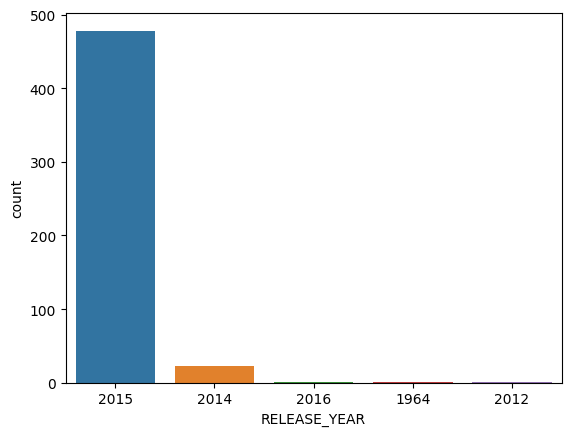

In [9]:
#we can visualize the movie count with a count plot
sns.countplot(x = fandango_matrix_data["RELEASE_YEAR"]);

In [11]:
#what 10 movies have the higest number of vote);
print(fandango_matrix_data[["FILM", "VOTES"]].iloc[:10]);

                                               FILM  VOTES
0                       Fifty Shades of Grey (2015)  34846
1                             Jurassic World (2015)  34390
2                            American Sniper (2015)  34085
3                                  Furious 7 (2015)  33538
4                                 Inside Out (2015)  15749
5  The Hobbit: The Battle of the Five Armies (2014)  15337
6               Kingsman: The Secret Service (2015)  15205
7                                    Minions (2015)  14998
8                    Avengers: Age of Ultron (2015)  14846
9                             Into the Woods (2014)  13055


In [17]:
#how many movies have zero votes
print(len(fandango_matrix_data[fandango_matrix_data["VOTES"] == 0]));

69


In [18]:
reviewed_fandango_movies = fandango_matrix_data[fandango_matrix_data["VOTES"] > 0];
print(reviewed_fandango_movies.info());

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FILM          435 non-null    object 
 1   STARS         435 non-null    float64
 2   RATING        435 non-null    float64
 3   VOTES         435 non-null    int64  
 4   RELEASE_YEAR  435 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB
None


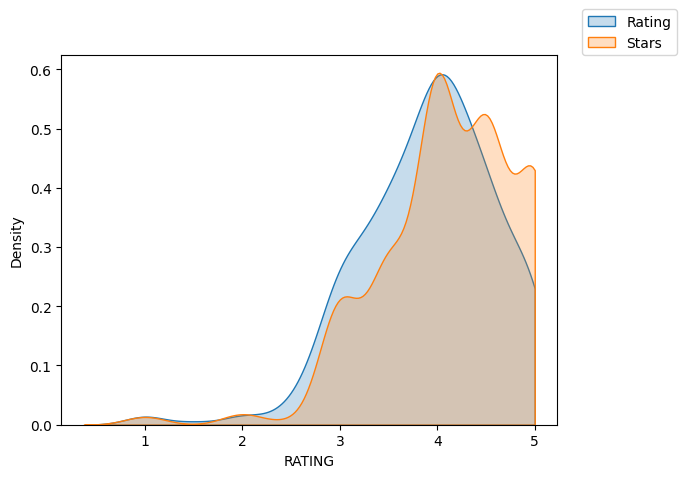

In [100]:
sns.kdeplot(x = reviewed_fandango_movies["RATING"], fill = True, clip=(0, 5), label = "Rating");
sns.kdeplot(x = reviewed_fandango_movies["STARS"], fill = True, clip = (0, 5), label = "Stars");
plotter.legend(loc = (1.05, 1));

In [38]:
reviewed_fandango_movies["STARS_DIFF"] = np.vectorize(lambda a, b: a-b)(reviewed_fandango_movies["STARS"], reviewed_fandango_movies["RATING"]);

C:\Users\omoke\AppData\Local\Temp\ipykernel_2012\2477898103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_fandango_movies["STARS_DIFF"] = np.vectorize(lambda a, b: a-b)(reviewed_fandango_movies["STARS"], reviewed_fandango_movies["RATING"]);


In [39]:
print(reviewed_fandango_movies.head(5));

                          FILM  STARS  RATING  VOTES RELEASE_YEAR  STARS_DIFF
0  Fifty Shades of Grey (2015)    4.0     3.9  34846         2015         0.1
1        Jurassic World (2015)    4.5     4.5  34390         2015         0.0
2       American Sniper (2015)    5.0     4.8  34085         2015         0.2
3             Furious 7 (2015)    5.0     4.8  33538         2015         0.2
4            Inside Out (2015)    4.5     4.5  15749         2015         0.0


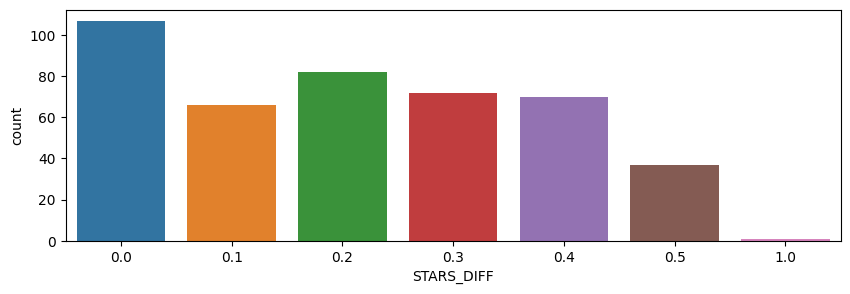

In [42]:
plotter.figure(figsize=(10, 3))
sns.countplot(x = reviewed_fandango_movies["STARS_DIFF"].round(1));

In [43]:
print(reviewed_fandango_movies[reviewed_fandango_movies["STARS_DIFF"] == 1]);

                 FILM  STARS  RATING  VOTES RELEASE_YEAR  STARS_DIFF
381  Turbo Kid (2015)    5.0     4.0      2         2015         1.0


In [45]:
print(other_matrix_data.head());

                             FILM  RottenTomatoes  RottenTomatoes_User   
0  Avengers: Age of Ultron (2015)              74                   86  \
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count   
0          66              7.1   7.8                        1330  \
1          67              7.5   7.1                         249   
2          64              8.1   7.8                         627   
3          22              4.7   5.4                          31   
4          29              3.4   5.1                          88   

   IMDB_user_vote_count  
0                271107  
1                 65709  
2                103660  
3                  3136  
4               

In [46]:
print(other_matrix_data.describe())

       RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User   
count      146.000000           146.000000  146.000000       146.000000  \
mean        60.849315            63.876712   58.808219         6.519178   
std         30.168799            20.024430   19.517389         1.510712   
min          5.000000            20.000000   13.000000         2.400000   
25%         31.250000            50.000000   43.500000         5.700000   
50%         63.500000            66.500000   59.000000         6.850000   
75%         89.000000            81.000000   75.000000         7.500000   
max        100.000000            94.000000   94.000000         9.600000   

             IMDB  Metacritic_user_vote_count  IMDB_user_vote_count  
count  146.000000                  146.000000            146.000000  
mean     6.736986                  185.705479          42846.205479  
std      0.958736                  316.606515          67406.509171  
min      4.000000                    4.00000

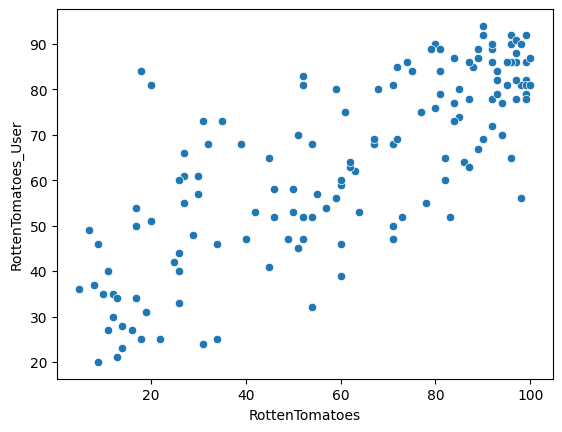

In [47]:
sns.scatterplot(x = other_matrix_data["RottenTomatoes"], y = other_matrix_data["RottenTomatoes_User"]);

In [48]:
other_matrix_data["Rotten_Diff"] = other_matrix_data["RottenTomatoes"] - other_matrix_data["RottenTomatoes_User"];

In [49]:
print(other_matrix_data["Rotten_Diff"].abs().mean());

15.095890410958905


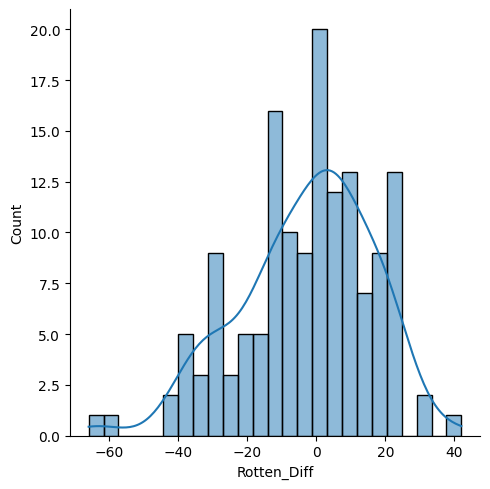

In [51]:
sns.displot(x = other_matrix_data["Rotten_Diff"], kde = True, bins = 25);

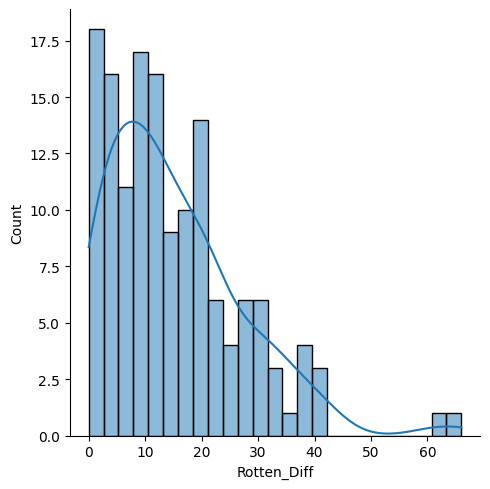

In [52]:
sns.displot(x = other_matrix_data["Rotten_Diff"].abs(), kde = True, bins = 25);

In [65]:
print(other_matrix_data[["FILM", "Rotten_Diff"]].iloc[other_matrix_data["Rotten_Diff"].sort_values()[: 5].index]);

                          FILM  Rotten_Diff
3       Do You Believe? (2015)          -66
85           Little Boy (2015)          -61
134    The Longest Ride (2015)          -42
105    Hitman: Agent 47 (2015)          -42
125  The Wedding Ringer (2015)          -39


In [66]:
print(other_matrix_data[["FILM", "Rotten_Diff"]].iloc[other_matrix_data["Rotten_Diff"].sort_values(ascending= False)[: 5].index])

                                   FILM  Rotten_Diff
69                    Mr. Turner (2014)           42
112                   It Follows (2015)           31
115            While We're Young (2015)           31
145  Kumiko, The Treasure Hunter (2015)           24
37                 Welcome to Me (2015)           24


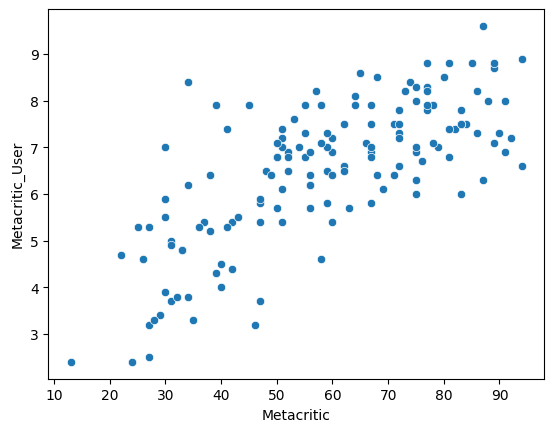

In [68]:
sns.scatterplot(x = other_matrix_data["Metacritic"], y = other_matrix_data["Metacritic_User"]);

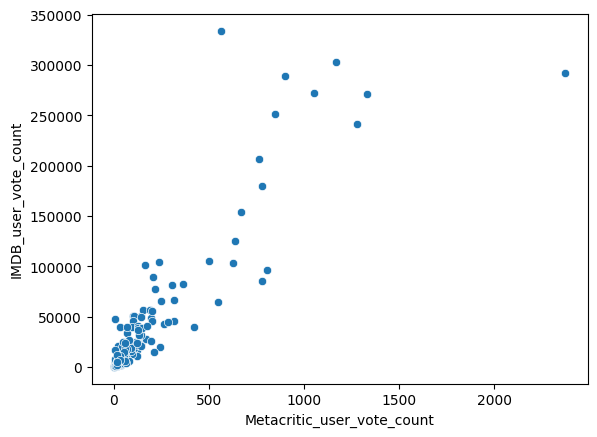

In [69]:
sns.scatterplot(x = other_matrix_data["Metacritic_user_vote_count"], y = other_matrix_data["IMDB_user_vote_count"]);

In [73]:
print(other_matrix_data.iloc[other_matrix_data["IMDB_user_vote_count"].argmax()]);

FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
Rotten_Diff                                          -2
Name: 14, dtype: object


In [74]:
print(other_matrix_data[["FILM", "Metacritic_user_vote_count"]].iloc[other_matrix_data["Metacritic_user_vote_count"].argmax()]);

FILM                          Mad Max: Fury Road (2015)
Metacritic_user_vote_count                         2375
Name: 88, dtype: object


In [75]:
combined_matrix_data = pan.merge(left = reviewed_fandango_movies, right = other_matrix_data, how = "inner");

In [78]:
print(combined_matrix_data.head());

                          FILM  STARS  RATING  VOTES RELEASE_YEAR  STARS_DIFF   
0  Fifty Shades of Grey (2015)    4.0     3.9  34846         2015         0.1  \
1        Jurassic World (2015)    4.5     4.5  34390         2015         0.0   
2       American Sniper (2015)    5.0     4.8  34085         2015         0.2   
3             Furious 7 (2015)    5.0     4.8  33538         2015         0.2   
4            Inside Out (2015)    4.5     4.5  15749         2015         0.0   

   RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  IMDB   
0              25                   42          46              3.2   4.2  \
1              71                   81          59              7.0   7.3   
2              72                   85          72              6.6   7.4   
3              81                   84          67              6.8   7.4   
4              98                   90          94              8.9   8.6   

   Metacritic_user_vote_count  IMDB_user_vote_coun

In [79]:
combined_matrix_data["RT_norm"] = combined_matrix_data["RottenTomatoes"]/20;
combined_matrix_data["RTUser_norm"] = combined_matrix_data["RottenTomatoes_User"]/20;
combined_matrix_data["Metacritic_norm"] = combined_matrix_data["Metacritic"]/20;
combined_matrix_data["MetacriticU_norm"] = combined_matrix_data["Metacritic_User"]/2;
combined_matrix_data["IMDB_norm"] = combined_matrix_data["IMDB"]/2;

In [80]:
print(combined_matrix_data.columns);

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'RELEASE_YEAR', 'STARS_DIFF',
       'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff', 'RT_norm', 'RTUser_norm',
       'Metacritic_norm', 'MetacriticU_norm', 'IMDB_norm'],
      dtype='object')


In [81]:
norm_scores = combined_matrix_data[["STARS", "RATING", 'RT_norm', 'RTUser_norm',
       'Metacritic_norm', 'MetacriticU_norm', 'IMDB_norm']];

In [82]:
print(norm_scores.head());

   STARS  RATING  RT_norm  RTUser_norm  Metacritic_norm  MetacriticU_norm   
0    4.0     3.9     1.25         2.10             2.30              1.60  \
1    4.5     4.5     3.55         4.05             2.95              3.50   
2    5.0     4.8     3.60         4.25             3.60              3.30   
3    5.0     4.8     4.05         4.20             3.35              3.40   
4    4.5     4.5     4.90         4.50             4.70              4.45   

   IMDB_norm  
0       2.10  
1       3.65  
2       3.70  
3       3.70  
4       4.30  


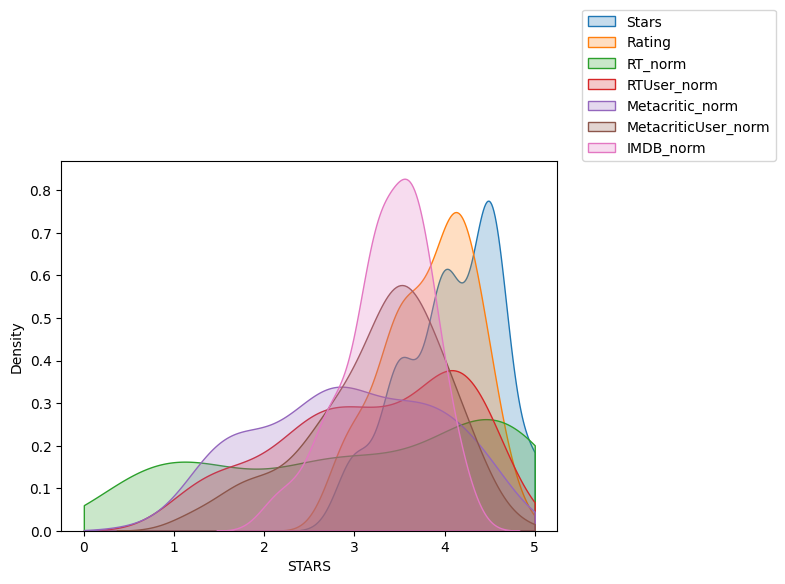

In [101]:
sns.kdeplot(data = norm_scores, x = "STARS", fill = True, clip = [0, 5], label = "Stars");
sns.kdeplot(data = norm_scores, x = "RATING", fill = True, clip = [0, 5], label = "Rating");
sns.kdeplot(data = norm_scores, x = "RT_norm", fill = True, clip = [0, 5], label = "RT_norm");
sns.kdeplot(data = norm_scores, x = "RTUser_norm", fill = True, clip = [0, 5], label = "RTUser_norm");
sns.kdeplot(data = norm_scores, x = "Metacritic_norm", fill = True, clip = [0, 5], label = "Metacritic_norm");
sns.kdeplot(data = norm_scores, x = "MetacriticU_norm", fill = True, clip = [0, 5], label = "MetacriticUser_norm");
sns.kdeplot(data = norm_scores, x = "IMDB_norm", fill = True, clip = [0, 5], label = "IMDB_norm");
plotter.legend(loc = (1.05, 1));

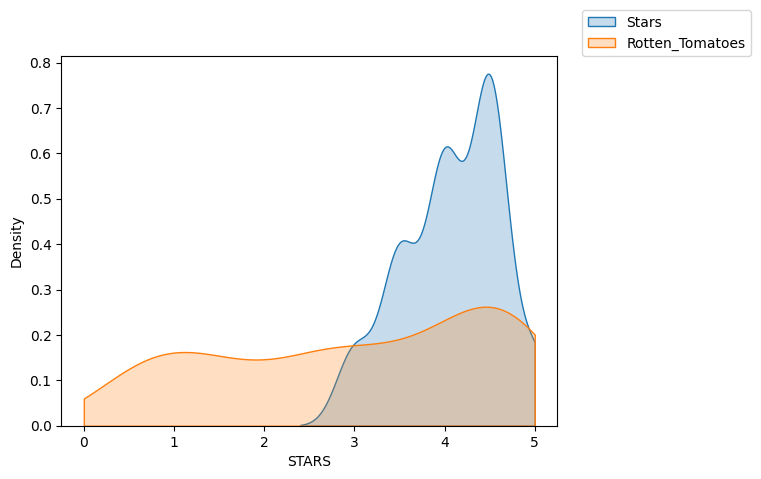

In [102]:
sns.kdeplot(data = norm_scores, x = "STARS", fill = True, clip = [0, 5], label = "Stars");
sns.kdeplot(data = norm_scores, x = "RT_norm", fill = True, clip = [0, 5], label = "Rotten_Tomatoes");
plotter.legend(loc = (1.05, 1));

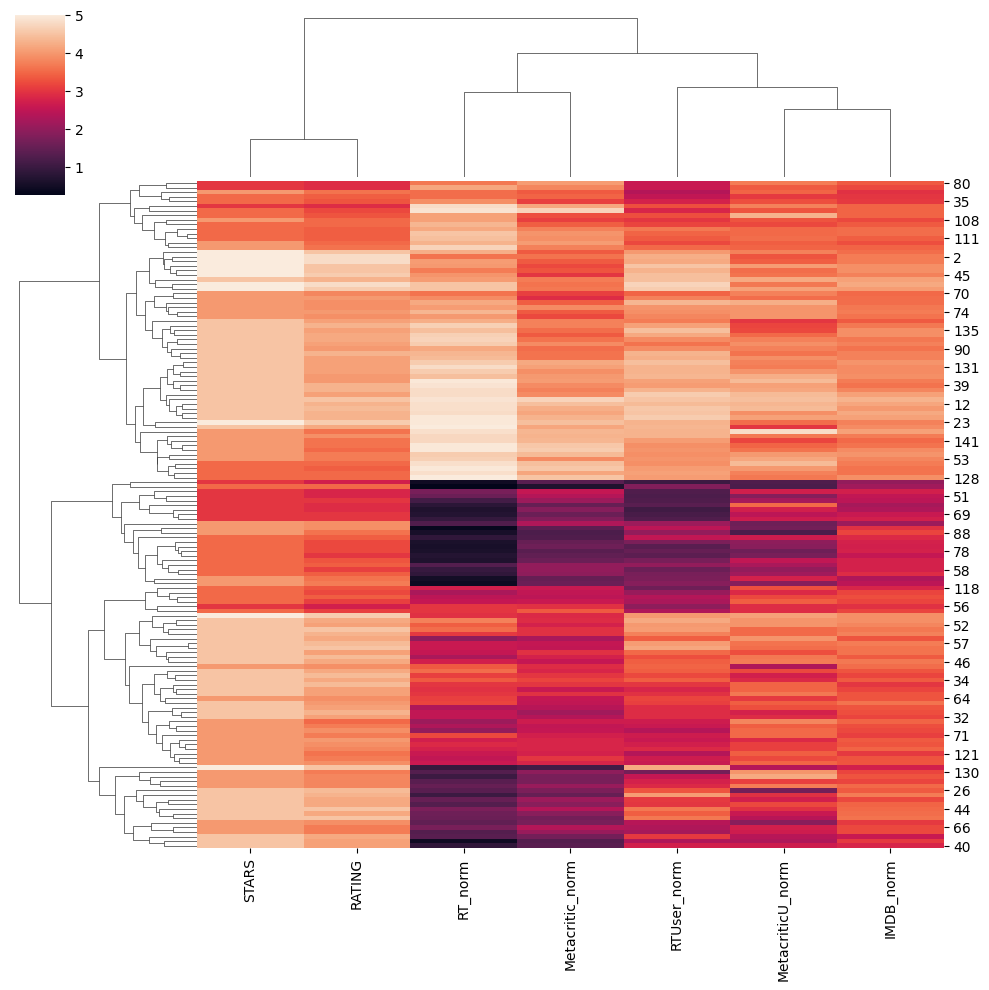

In [87]:
sns.clustermap(data = norm_scores);

In [88]:
norm_scores["Film"] = combined_matrix_data["FILM"];

C:\Users\omoke\AppData\Local\Temp\ipykernel_2012\2525016772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_scores["Film"] = combined_matrix_data["FILM"];


In [90]:
print(norm_scores.head(5));
print(fandango_matrix_data.head(5));

   STARS  RATING  RT_norm  RTUser_norm  Metacritic_norm  MetacriticU_norm   
0    4.0     3.9     1.25         2.10             2.30              1.60  \
1    4.5     4.5     3.55         4.05             2.95              3.50   
2    5.0     4.8     3.60         4.25             3.60              3.30   
3    5.0     4.8     4.05         4.20             3.35              3.40   
4    4.5     4.5     4.90         4.50             4.70              4.45   

   IMDB_norm                         Film  
0       2.10  Fifty Shades of Grey (2015)  
1       3.65        Jurassic World (2015)  
2       3.70       American Sniper (2015)  
3       3.70             Furious 7 (2015)  
4       4.30            Inside Out (2015)  
                          FILM  STARS  RATING  VOTES RELEASE_YEAR
0  Fifty Shades of Grey (2015)    4.0     3.9  34846         2015
1        Jurassic World (2015)    4.5     4.5  34390         2015
2       American Sniper (2015)    5.0     4.8  34085         2015
3        

In [94]:
print(norm_scores.iloc[norm_scores["RT_norm"].sort_values(ascending =  True)[: 10].index]);

    STARS  RATING  RT_norm  RTUser_norm  Metacritic_norm  MetacriticU_norm   
49    3.5     3.5     0.25         1.80             0.65              1.20  \
84    4.0     3.9     0.35         2.45             1.40              1.65   
54    4.0     3.7     0.40         1.85             1.55              1.85   
25    4.5     4.1     0.45         2.30             1.30              2.30   
28    3.0     2.7     0.45         1.00             1.35              1.25   
50    4.0     3.6     0.50         1.75             1.50              2.75   
88    4.0     3.6     0.55         2.00             1.20              1.20   
87    3.5     3.2     0.55         1.35             1.60              1.90   
78    3.5     3.2     0.60         1.50             1.35              1.60   
77    3.5     3.2     0.60         1.75             1.50              1.95   

    IMDB_norm                           Film  
49       2.15  Paul Blart: Mall Cop 2 (2015)  
84       2.95        Hitman: Agent 47 (2015)  


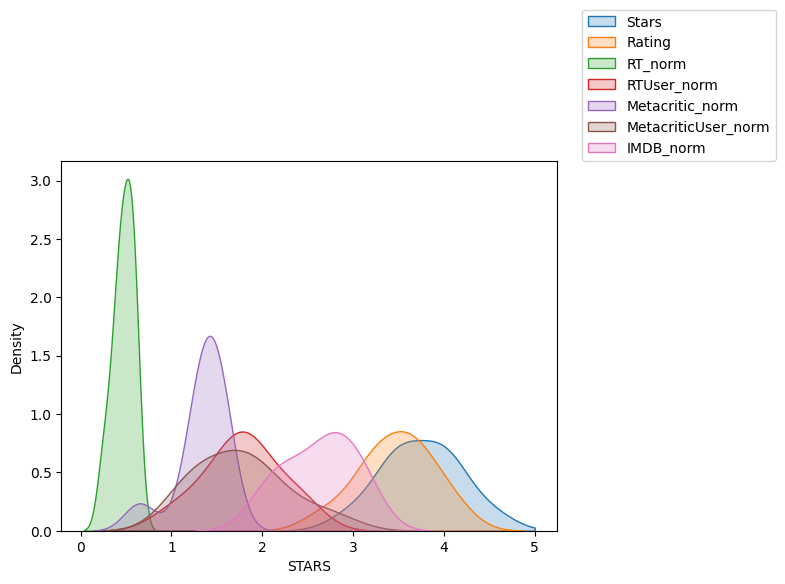

In [103]:
sns.kdeplot(data = norm_scores.iloc[norm_scores["RT_norm"].sort_values(ascending =  True)[: 10].index], x = "STARS", fill = True, clip = [0, 5], label = "Stars");
sns.kdeplot(data = norm_scores.iloc[norm_scores["RT_norm"].sort_values(ascending =  True)[: 10].index], x = "RATING", fill = True, clip = [0, 5], label = "Rating");
sns.kdeplot(data = norm_scores.iloc[norm_scores["RT_norm"].sort_values(ascending =  True)[: 10].index], x = "RT_norm", fill = True, clip = [0, 5], label = "RT_norm");
sns.kdeplot(data = norm_scores.iloc[norm_scores["RT_norm"].sort_values(ascending =  True)[: 10].index], x = "RTUser_norm", fill = True, clip = [0, 5], label = "RTUser_norm");
sns.kdeplot(data = norm_scores.iloc[norm_scores["RT_norm"].sort_values(ascending =  True)[: 10].index], x = "Metacritic_norm", fill = True, clip = [0, 5], label = "Metacritic_norm");
sns.kdeplot(data = norm_scores.iloc[norm_scores["RT_norm"].sort_values(ascending =  True)[: 10].index], x = "MetacriticU_norm", fill = True, clip = [0, 5], label = "MetacriticUser_norm");
sns.kdeplot(data = norm_scores.iloc[norm_scores["RT_norm"].sort_values(ascending =  True)[: 10].index], x = "IMDB_norm", fill = True, clip = [0, 5], label = "IMDB_norm");
plotter.legend(loc = (1.05, 1));